<a href="https://colab.research.google.com/github/rmfpdlxmtidl/MachineLearningAssignments/blob/master/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

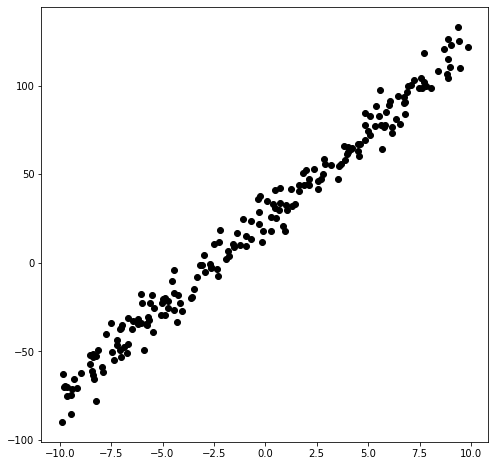

In [110]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

# plot a set of points (xi, yi) that are loaded from 'data.csv' file (in black color)
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')
plt.show()


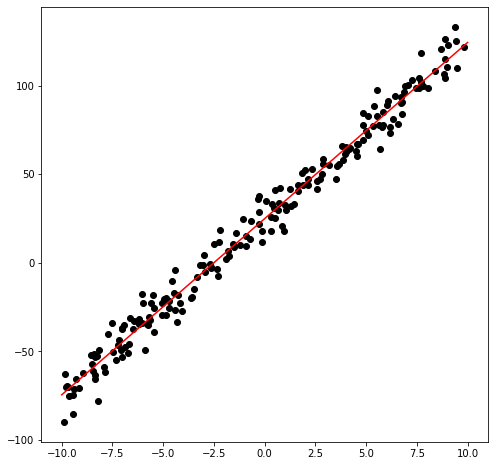

9.93463557764354 24.907395789137993


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import math

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

# initialize w1, w2, and step size
w1 = 5000
w2 = 1000
alpha = 0.01

while(1):
  # calculate sumation
  dj_dw1 = 0;
  dj_dw2 = 0;
  for xi, yi in zip(x_data, y_data):
    dj_dw1 += (w1 * xi + w2 - yi) * xi
    dj_dw2 += w1 * xi + w2 - yi

  # calculate next w1 and w2
  next_w1 = w1 - alpha * (1/len(x_data)) * dj_dw1
  next_w2 = w2 - alpha * (1/len(x_data)) * dj_dw2

  # break loop if w1 and w2 are converged
  if(math.isclose(next_w1, w1) and math.isclose(next_w2, w2)):
    break

  # update w1 and w2
  w1 = next_w1
  w2 = next_w2

plt.figure(figsize=(8, 8))

# plot a set of points (xi, yi) that are loaded from 'data.csv' file (in black color)
plt.scatter(x_data, y_data, color='black')

# plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)
plt.plot([-10, 10], [-10 * w1 + w2, 10 * w1 + w2], color='red')
plt.show()
print("Theta1: " + str(w1), ", Theta0: " + str(w2))

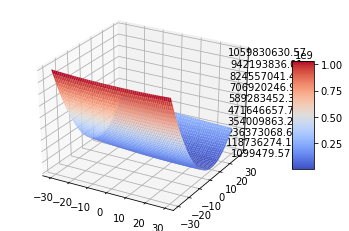

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Objective Function J(w1, w2)
def J(w1, w2):
  sigma = 0
  for xi, yi in zip(x_data, y_data):
    sigma += (w1 + w2 * xi - yi) ** 2
  return (1/2*len(x_data)) * sigma

# 1. Input points [2pt]
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

# 3. Plot the energy surface [4pt]
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot the energy surface (W1, W2, J(W1, W2)) with the range of variables W1=[−30:0.1:30] and W2=[−30:0.1:30]
W1 = np.arange(-30, 30, 0.1)
W2 = np.arange(-30, 30, 0.1)
W1, W2 = np.meshgrid(W1, W2)
surf = ax.plot_surface(W1, W2, J(W1, W2), rstride=10, cstride=10, cmap=cm.coolwarm, linewidth=0)

# set z axis locator
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

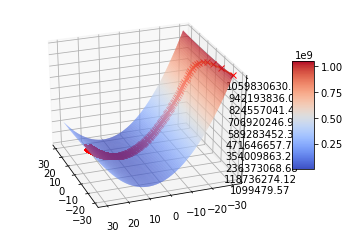

Theta1: 9.934635500765037 , Theta0: 24.907390796540845


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Objective Function J(w1, w2)
def J(theta1, theta0):
  sigma = 0
  for xi, yi in zip(x_data, y_data):
    sigma += (theta1 + theta0 * xi - yi) ** 2
  return (1/2*len(x_data)) * sigma

# 1. Input points [2pt]
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

# 3. Plot the energy surface [4pt]
fig = plt.figure()
ax = fig.gca(projection='3d')

W1 = np.arange(-30, 30, 0.1)
W2 = np.arange(-30, 30, 0.1)
W1, W2 = np.meshgrid(W1, W2)
surf = ax.plot_surface(W1, W2, J(W1, W2), rstride=4, cstride=4, cmap=cm.coolwarm, linewidth=0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)

# 4. Plot the gradient descent path on the energy surface [5pt]
w1 = -30
w2 = -30
alpha = 0.01
x = []
y = []
z = []
i = 0

while(1):
  x.append(w1)
  y.append(w2)
  z.append(J(w1, w2))

  dj_dw1 = 0;
  dj_dw2 = 0;
  for xi, yi in zip(x_data, y_data):
    dj_dw1 += (w1 * xi + w2 - yi) * xi
    dj_dw2 += w1 * xi + w2 - yi

  next_w1 = w1 - alpha * (1/len(x_data)) * dj_dw1
  next_w2 = w2 - alpha * (1/len(x_data)) * dj_dw2

  if(math.isclose(next_w1, w1) and math.isclose(next_w2, w2)):
    break

  w1 = next_w1
  w2 = next_w2

ax.plot(x, y, z, marker="x", markeredgecolor="red")
ax.view_init(30, 160)
plt.show()
print("Theta1: " + str(w1), ", Theta0: " + str(w2))